# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [6]:
import numpy as np # You will need to import numpy
import matplotlib.pyplot as plt

In [7]:
# You can use this function in your code to find the log of distance:

# np.log10()

#### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [8]:
df = pd.read_csv("oh_table.csv")

distance = df["distance"].loc[df["group_id"] == 8]
G = df["G"].loc[df["group_id"] == 8]
J = df["J"].loc[df["group_id"] == 8]

In [9]:
abs_mag = G - 5 * np.log10(distance) + 5
print(abs_mag)

744    1.772434
745    4.406912
746    4.585319
747    3.278442
748    2.624626
749    3.197933
750    4.603274
751    2.052496
752    2.168302
753    3.214047
754    1.672931
755    3.462670
756    1.247206
757    1.533027
758    3.432659
759    3.627118
760    2.291942
761    3.146903
762    4.093482
763    2.614529
764    0.602441
765    4.477762
766    3.704736
767    3.702780
768    5.160958
769    3.072015
770    2.104777
771    2.438197
772    5.651691
773    3.184717
774    3.318625
775    4.619180
776    5.894681
777    2.976185
778    5.214089
779    1.953262
780    0.087911
781    3.904671
782    0.698769
783    5.211503
784    3.682744
785    4.151338
786    5.613752
787    2.665424
788    4.003561
789    4.805678
790    3.053611
dtype: float64


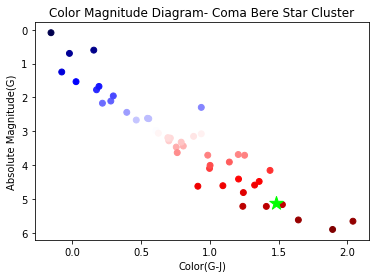

In [10]:
cm = plt.cm.get_cmap("seismic")
plt.scatter(G-J,abs_mag, c=abs_mag, s=35, cmap=cm)
plt.scatter(5.12-3.64,5.12, c='lime', s=200, marker='*')
plt.title("Color Magnitude Diagram- Coma Bere Star Cluster")
plt.xlabel("Color(G-J)")
plt.ylabel("Absolute Magnitude(G)")
plt.gca().invert_yaxis()
plt.show()

In [11]:
# imports the packages we need to create our CMD
import numpy as np
import matplotlib.pyplot as plt

# defining our CMD function
def CMD(loc):
    
    # opens our file using pandas
    df = pd.read_csv("oh_table.csv")
    
    # defining distance, G, and J using the group id(lists)
    distance = df["distance"].loc[df["group_id"] == loc]
    G = df["G"].loc[df["group_id"] == loc]
    J = df["J"].loc[df["group_id"] == loc]
    
    # defines the absolute magnitude using the formula(list)
    abs_mag = G - 5 * np.log10(distance) + 5
    
    # defines cm as our color map
    cm = plt.cm.get_cmap("seismic")
    
    # creates a scatter plot using G-J as the x values and the absolute 
    # magnitude as the y values
    plt.scatter(G-J,abs_mag, c=abs_mag, s=35, cmap=cm)
    
    # creates another scatter plot placing the sun
    plt.scatter(5.12-3.64,5.12, c='lime', s=200, marker='*')
    
    # adds a title and labels to our axes
    plt.title("Color Magnitude Diagram- Coma Bere Star Cluster")
    plt.xlabel("Color(G-J)")
    plt.ylabel("Absolute Magnitude(G)")
    
    # inverts the y axis
    plt.gca().invert_yaxis()
    
    # saves our graph to our computer
    plt.savefig("CMD.png")

# calls our function
CMD(8)